# Fashion MNIST

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices())

# tf.keras.utils.set_random_seed(812)
# tf.config.experimental.enable_op_determinism()

2023-10-02 21:14:24.618946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 21:14:25.947419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2023-10-02 21:14:27.920690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 21:14:28.088409: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
PX_ROWS = 28
PX_COLS = 28
CLASSES_NUM = 10
EPOCHS_NUM = 10

from tensorflow.keras.optimizers import SGD, Adam
OPTIMIZER = lambda: Adam()
# OPTIMIZER = lambda: SGD(learning_rate=0.01, momentum=0.01)

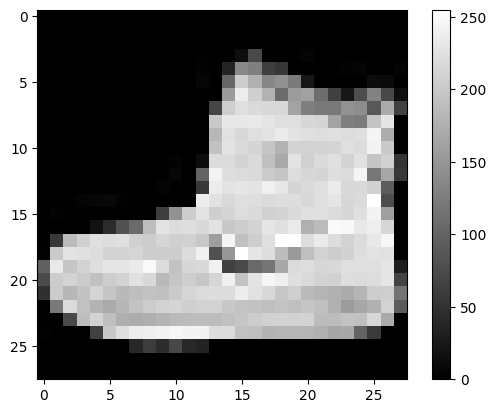

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0], cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

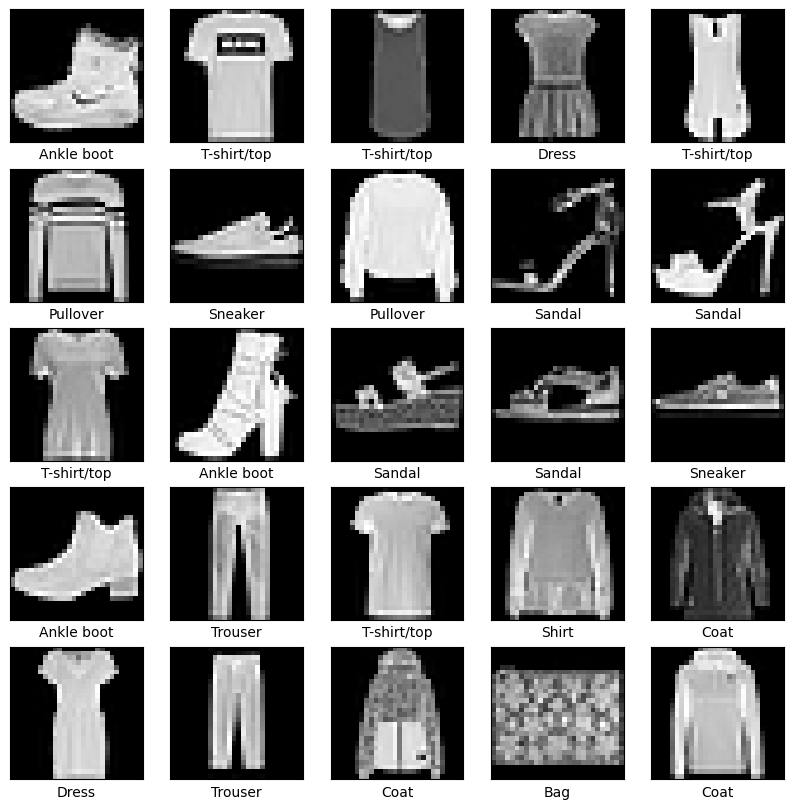

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## RVMLPNN

In [12]:
RVMLPNN_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(PX_ROWS, PX_COLS,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-09-30 18:34:42.109259: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-30 18:34:42.109613: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-30 18:34:42.109863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-30 18:34:43.043129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-30 18:34:43.043343: I tensorflow/compile

In [13]:
RVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
RVMLPNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
RVMLPNN_history = RVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM, verbose=1)
RVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10


2023-09-30 18:34:45.099161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-30 18:34:45.114845: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fac17c66f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-30 18:34:45.114880: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-09-30 18:34:45.142942: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-30 18:34:45.355930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-30 18:34:45.529102: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4978 - accuracy: 0.8235 - val_loss: 0.4120 - val_accuracy: 0.8529
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3728 - accuracy: 0.8649 - val_loss: 0.3810 - val_accuracy: 0.8587
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3381 - accuracy: 0.8764 - val_loss: 0.3586 - val_accuracy: 0.8678
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - accuracy: 0.8849 - val_loss: 0.3634 - val_accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2967 - accuracy: 0.8904 - val_loss: 0.3449 - val_accuracy: 0.8731
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8960 - val_loss: 0.3411 - val_accuracy: 0.8777
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2709 - accuracy: 0.9001 - val_loss: 0.3457 - val_accuracy: 0.8767
Epo

[0.3557784855365753, 0.8744999766349792]

## RVCNN

In [15]:
train_reshaped = train_images.reshape(train_images.shape[0], PX_COLS, PX_ROWS, 1)
test_reshaped = test_images.reshape(test_images.shape[0], PX_COLS, PX_ROWS, 1)

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

RVCNN_model = tf.keras.Sequential()
RVCNN_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(PX_ROWS, PX_COLS, 1))) 
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Flatten())
RVCNN_model.add(Dense(256, activation='relu'))
RVCNN_model.add(Dropout(0.5))
RVCNN_model.add(Dense(CLASSES_NUM, activation='softmax'))


RVCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
RVCNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [17]:
RVCNN_history = RVCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=1)
RVCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

Epoch 1/10
600/600 [==============================] - 6s 4ms/step - loss: 0.5418 - accuracy: 0.8050 - val_loss: 0.3569 - val_accuracy: 0.8710
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3529 - accuracy: 0.8740 - val_loss: 0.3058 - val_accuracy: 0.8860
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3104 - accuracy: 0.8891 - val_loss: 0.2839 - val_accuracy: 0.8952
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2845 - accuracy: 0.8953 - val_loss: 0.2799 - val_accuracy: 0.8980
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2685 - accuracy: 0.9022 - val_loss: 0.2646 - val_accuracy: 0.9022
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2528 - accuracy: 0.9068 - val_loss: 0.2505 - val_accuracy: 0.9067
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2411 - accuracy: 0.9118 - val_loss: 0.2599 - val_accuracy: 0.9056
Epoch 

[0.23989337682724, 0.9121000170707703]

## CVMLPNN

In [18]:
from cvnn import layers
import numpy as np

CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexFlatten(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexDense(128, activation='cart_relu', dtype=np.float32),
    layers.ComplexDense(10, dtype=np.float32)
])

In [19]:
CVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten (ComplexFl  (None, 784)               0         
 atten)                                                          
                                                                 
 complex_dense (ComplexDens  (None, 128)               100480    
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 10)                1290      
 nse)                                                            
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
CVMLPNN_history = CVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM)
CVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4958 - accuracy: 0.8264 - val_loss: 0.4363 - val_accuracy: 0.8417
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3745 - accuracy: 0.8641 - val_loss: 0.3984 - val_accuracy: 0.8585
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.8762 - val_loss: 0.3687 - val_accuracy: 0.8684
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8862 - val_loss: 0.3673 - val_accuracy: 0.8679
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.8902 - val_loss: 0.3790 - val_accuracy: 0.8692
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8967 - val_loss: 0.3452 - val_accuracy: 0.8748
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2708 - accuracy: 0.8988 - val_loss: 0.3412 - val_accuracy:

[0.33872511982917786, 0.8838000297546387]

## CNCNN

In [21]:
CNCNN_model = tf.keras.Sequential()
# conv_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CNCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu', input_shape=(PX_ROWS, PX_COLS, 1), dtype=np.float32)) 
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu', dtype=np.float32))
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexFlatten())
CNCNN_model.add(layers.ComplexDense(256, activation='cart_relu', dtype=np.float32))
CNCNN_model.add(Dropout(0.5))
CNCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax', dtype=np.float32))


CNCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
CNCNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d (ComplexCon  (None, 28, 28, 64)        320       
 v2D)                                                            
                                                                 
 complex_max_pooling2d (Com  (None, 14, 14, 64)        0         
 plexMaxPooling2D)                                               
                                                                 
 complex_conv2d_1 (ComplexC  (None, 14, 14, 32)        8224      
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_1 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten_1 (Complex  (None, 1568)             

In [22]:
CNCNN_history = CNCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=1)
CNCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

Epoch 1/10
600/600 [==============================] - 9s 13ms/step - loss: 0.5463 - accuracy: 0.8032 - val_loss: 0.3594 - val_accuracy: 0.8682
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3553 - accuracy: 0.8708 - val_loss: 0.3257 - val_accuracy: 0.8792
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3139 - accuracy: 0.8858 - val_loss: 0.2876 - val_accuracy: 0.8935
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2887 - accuracy: 0.8941 - val_loss: 0.2781 - val_accuracy: 0.8971
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2710 - accuracy: 0.9016 - val_loss: 0.2618 - val_accuracy: 0.9038
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2528 - accuracy: 0.9072 - val_loss: 0.2628 - val_accuracy: 0.9023
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2404 - accuracy: 0.9110 - val_loss: 0.2473 - val_accuracy: 0.9083

[0.24045242369174957, 0.9093999862670898]

## CVMLPNN - complex input

In [23]:
import numpy as np
from cvnn import layers

train_fourier = np.fft.fft2(train_images)
test_fourier = np.fft.fft2(test_images)

max_abs = np.abs(train_fourier).max()
train_fourier = train_fourier / max_abs
test_fourier = test_fourier / max_abs
print('max_abs:', max_abs)

max_abs: 589.7529411764706


In [25]:
CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexInput(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexFlatten(),
    layers.ComplexDense(64, activation='cart_relu'),
    layers.ComplexDense(10, activation='sigmoid_real'),
])

CVMLPNN_model.compile(optimizer=OPTIMIZER(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten_3 (Complex  (None, 784)               0         
 Flatten)                                                        
                                                                 
 complex_dense_6 (ComplexDe  (None, 64)                100480    
 nse)                                                            
                                                                 
 complex_dense_7 (ComplexDe  (None, 10)                1300      
 nse)                                                            
                                                                 
Total params: 101780 (397.58 KB)
Trainable params: 101780 (397.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
CVMLPNN_history = CVMLPNN_model.fit(train_fourier, train_labels, validation_data=(test_fourier, test_labels), epochs=EPOCHS_NUM, verbose=1)
CVMLPNN_model.evaluate(test_fourier, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6345 - accuracy: 0.8052 - val_loss: 0.4748 - val_accuracy: 0.8298
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4178 - accuracy: 0.8538 - val_loss: 0.4345 - val_accuracy: 0.8428
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3802 - accuracy: 0.8667 - val_loss: 0.4110 - val_accuracy: 0.8517
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3544 - accuracy: 0.8750 - val_loss: 0.3965 - val_accuracy: 0.8563
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3342 - accuracy: 0.8824 - val_loss: 0.3883 - val_accuracy: 0.8590
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3163 - accuracy: 0.8898 - val_loss: 0.3817 - val_accuracy: 0.8613
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3006 - accuracy: 0.8934 - val_loss: 0.3787 - val_accuracy:

## CVCNN - complex input

In [28]:
from cvnn.metrics import ComplexCategoricalAccuracy
from cvnn.losses import ComplexAverageCrossEntropy
from cvnn import layers


CVCNN_model = tf.keras.Sequential()
CVCNN_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CVCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu')) 
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu'))
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexFlatten())
CVCNN_model.add(layers.ComplexDense(256, activation='cart_relu'))
CVCNN_model.add(layers.ComplexDropout(0.5))
CVCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax'))


CVCNN_model.compile(loss=ComplexAverageCrossEntropy(),#'sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=[ComplexCategoricalAccuracy(name='accuracy')])#'accuracy'])
CVCNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d_4 (ComplexC  (None, 28, 28, 64)        640       
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_4 (C  (None, 14, 14, 64)        0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_conv2d_5 (ComplexC  (None, 14, 14, 32)        16448     
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_5 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten_5 (Complex  (None, 1568)             

In [29]:
one_hot_train = tf.one_hot(train_labels, CLASSES_NUM)
one_hot_test = tf.one_hot(test_labels, CLASSES_NUM)

CVCNN_history = CVCNN_model.fit(train_fourier, one_hot_train, validation_data=(test_fourier, one_hot_test), batch_size=100, epochs=EPOCHS_NUM, verbose=1)
CVCNN_model.evaluate(test_fourier, one_hot_test, verbose=2)

Epoch 1/10
600/600 [==============================] - 30s 47ms/step - loss: 0.8123 - accuracy: 0.7194 - val_loss: 0.5095 - val_accuracy: 0.8129
Epoch 2/10
600/600 [==============================] - 28s 46ms/step - loss: 0.4618 - accuracy: 0.8369 - val_loss: 0.4076 - val_accuracy: 0.8494
Epoch 3/10
600/600 [==============================] - 28s 46ms/step - loss: 0.3943 - accuracy: 0.8572 - val_loss: 0.3767 - val_accuracy: 0.8602
Epoch 4/10
600/600 [==============================] - 28s 46ms/step - loss: 0.3601 - accuracy: 0.8701 - val_loss: 0.3674 - val_accuracy: 0.8637
Epoch 5/10
600/600 [==============================] - 28s 46ms/step - loss: 0.3376 - accuracy: 0.8777 - val_loss: 0.3382 - val_accuracy: 0.8767
Epoch 6/10
600/600 [==============================] - 28s 46ms/step - loss: 0.3161 - accuracy: 0.8847 - val_loss: 0.3345 - val_accuracy: 0.8748
Epoch 7/10
600/600 [==============================] - 28s 46ms/step - loss: 0.3015 - accuracy: 0.8892 - val_loss: 0.3166 - val_accuracy:

[0.30907538533210754, 0.8899000287055969]

## Comaprision

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df

def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    # upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, cvnn_dataframe['loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower left")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()

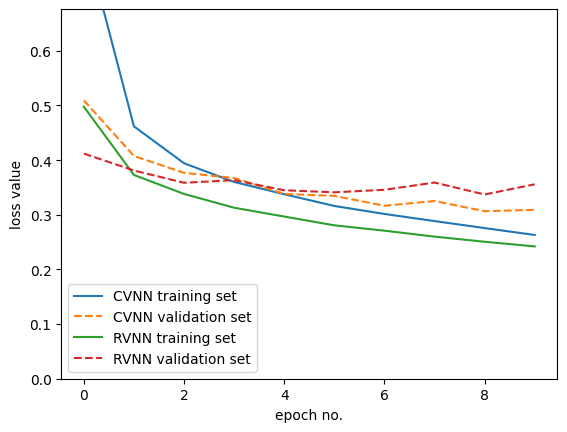

In [31]:
plot_loss_history_comparision(RVMLPNN_history, CVCNN_history)

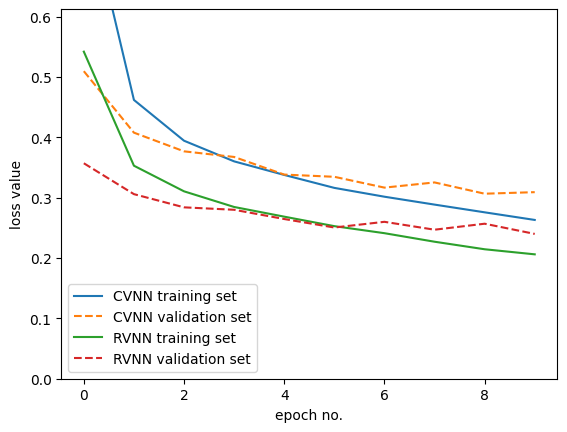

In [32]:
plot_loss_history_comparision(RVCNN_history, CVCNN_history)